# Setup

set working directory to guitarist-net and add to path

In [1]:
%cd /content/drive/Othercomputers/My MacBook Pro/guitarist-net

/content/drive/Othercomputers/My MacBook Pro/guitarist-net


install requirements

In [2]:
!pip install -r requirements.txt &> /dev/null

imports

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from plot_listen.listen import play
from plot_listen.plot import plot, plot_midi_conditioning
from data.guitarset_loader import GuitarSetLoader
from globals import *

# Load Audio + Conditioning for Track

In [6]:
loader = GuitarSetLoader(use_crepe_f0_labels=True)

In [8]:
track_IDs = list(loader.tracks.keys())

# Test create midi conditioning dataset

In [ ]:
dataset = loader.create_midi_conditioning_dataset(track_IDs[:2])

Extracting track data...


  0%|          | 0/2 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/librosa/core/convert.py:1107: RuntimeWarning: divide by zero encountered in log2
  midi: np.ndarray = 12 * (np.log2(np.asanyarray(frequencies)) - np.log2(440.0)) + 69


In [ ]:
for key in dataset:
    print(f"{key}: {dataset[key].shape}")

conditioning: (46, 250, 6, 2)
mic_audio: (46, 16000)
mix_audio: (46, 16000)


In [ ]:
print(data.)

## plot MIDI conditioning

In [ ]:
track_data = loader.get_audio_and_MIDI_conditioning_from_track(track_IDs[14])

/usr/local/lib/python3.7/dist-packages/librosa/core/convert.py:742: RuntimeWarning: divide by zero encountered in log2
  return 12 * (np.log2(np.asanyarray(frequencies)) - np.log2(440.0)) + 69


In [ ]:
play(track_data["mic_audio"][0])

In [ ]:
play(track_data["mix_audio"][0])

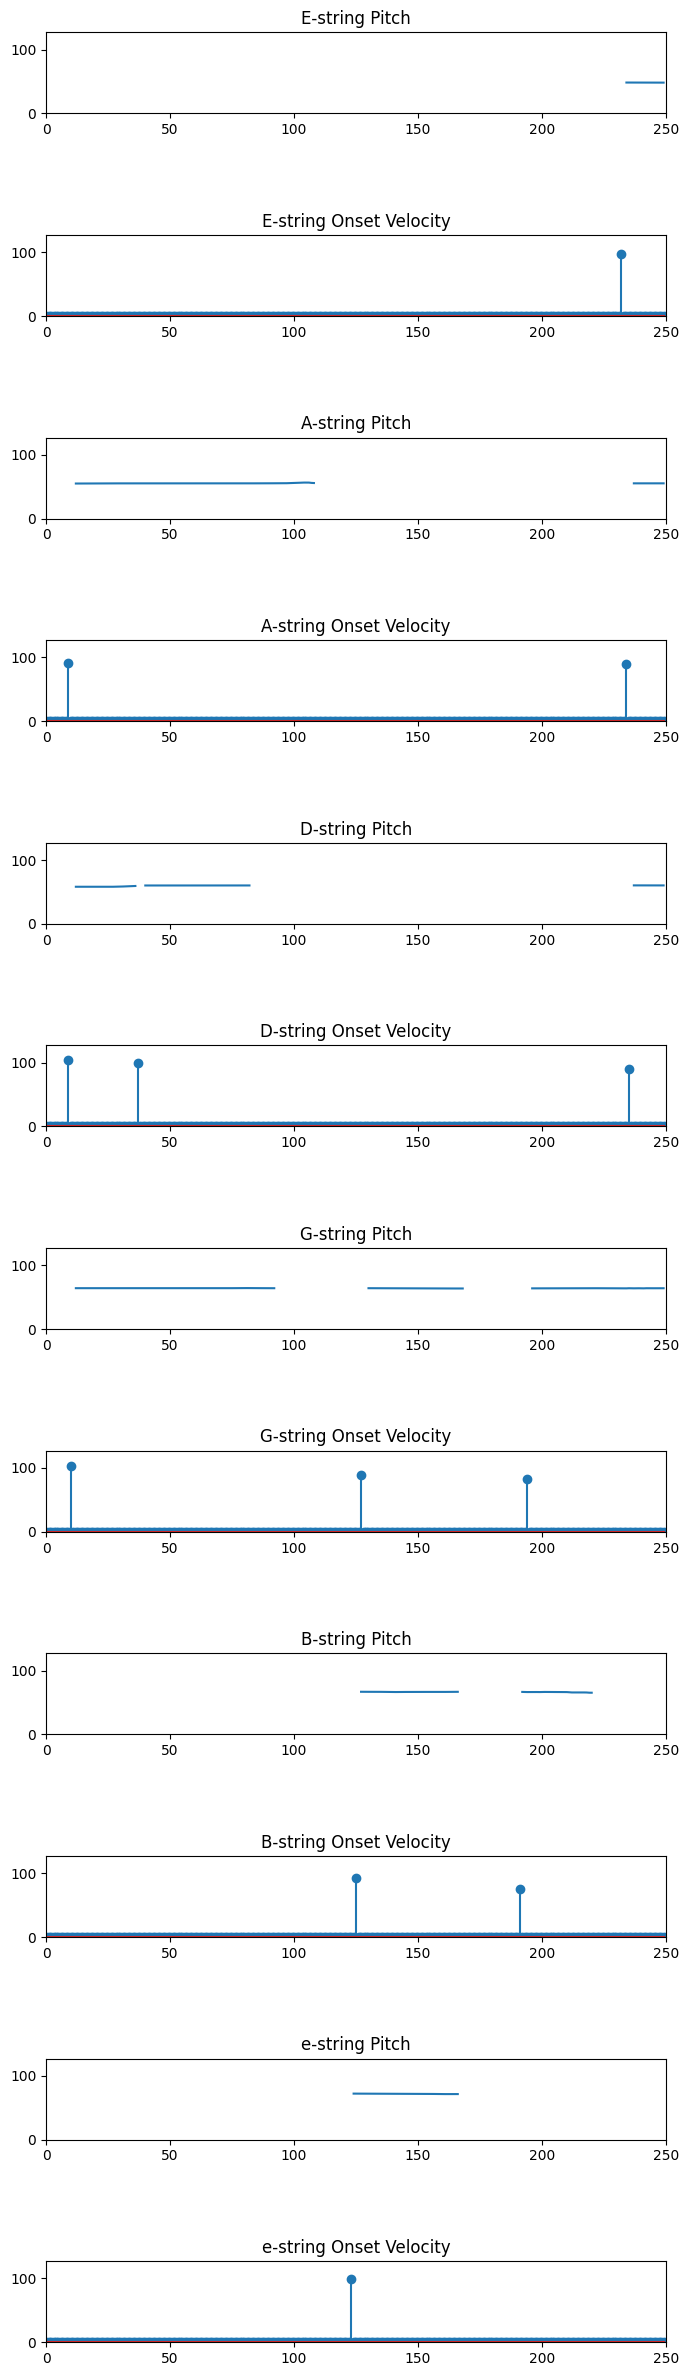

In [ ]:
plot_midi_conditioning(track_data["conditioning"][0])

# Testing code for plot midi conditioning

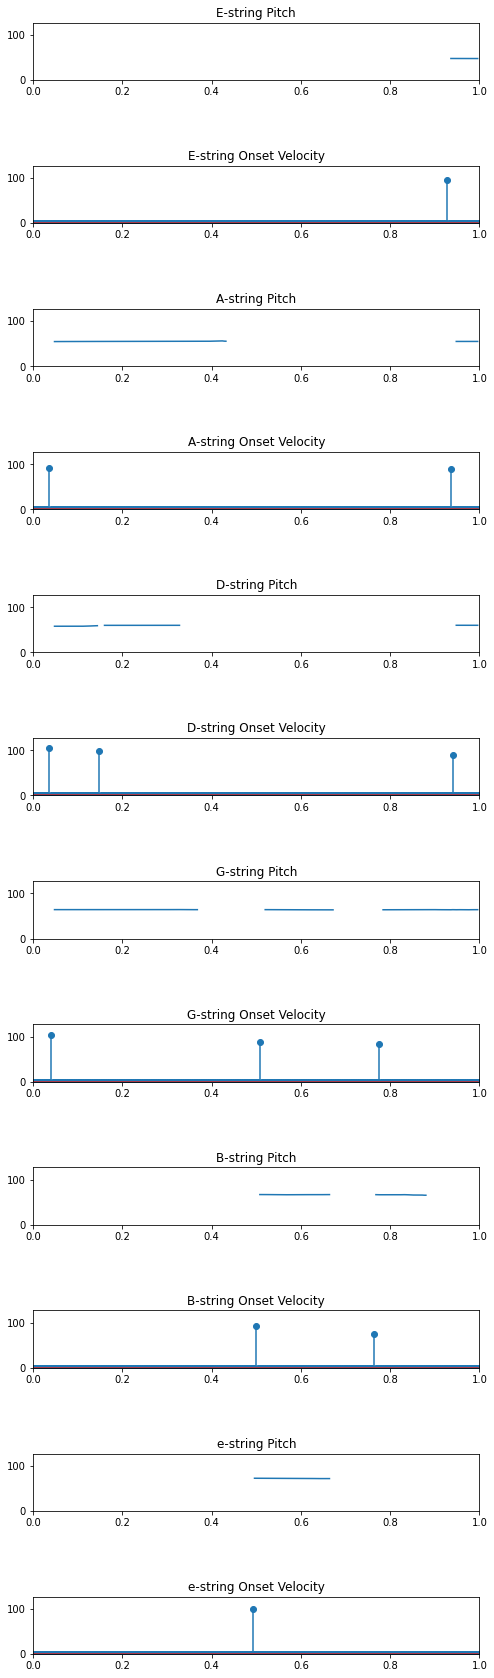

In [ ]:
fig, axs = plt.subplots(nrows=12,figsize=(8,30))
frames_list = np.array(range(len(cond))) / FRAME_RATE

for i in range(6):
    str_i = cond[:,i,:]

    # set plot index
    plot_ind = i * 2

    # the string conditioning is nonzero, plot
    if np.any(str_i):
        axs[plot_ind].plot(frames_list, str_i[:,0])
    axs[plot_ind].set_title(f"{GUITAR_STRING_LETTERS[i]}-string Pitch")
    axs[plot_ind].set_xlim(0,ITEM_DUR)
    axs[plot_ind].set_ylim(0,127)

    # set plot index
    plot_ind = (i * 2) + 1

    # the string conditioning is nonzero, plot
    if np.any(str_i):
        axs[plot_ind].stem(frames_list, str_i[:,1], use_line_collection=True)
    axs[plot_ind].set_title(f"{GUITAR_STRING_LETTERS[i]}-string Onset Velocity")
    axs[plot_ind].set_xlim(0,ITEM_DUR)
    axs[plot_ind].set_ylim(0,127)


plt.subplots_adjust(hspace=1.5) # adjust margin between subplots

## determine the maximum and minimum stringwise loudness (at time of an onset) in guitarset


In [ ]:
from tqdm import tqdm_notebook

In [ ]:
# determine the maximum and minimum stringwise loudness (at time of an onset) in guitarset

maximum = 0
minimum = 0
for track_ID in tqdm_notebook(track_IDs):
    track_data = loader.get_audio_and_MIDI_conditioning_from_track(track_ID)
    onset_velocities = track_data["conditioning"][:,:,:,1]
    if np.max(onset_velocities) > maximum:
        maximum = np.max(onset_velocities)
        print(f"new max: {maximum}")
    if np.min(onset_velocities) < minimum:
        minimum = np.min(onset_velocities)
        print(f"new min: {minimum}")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


  0%|          | 0/360 [00:00<?, ?it/s]

new max: 13.691675091931419
new min: -22.75072336248503
new max: 15.250799302734809
new max: 16.021909674695245
new min: -25.14142503301691
new max: 18.44142415635204
new min: -33.02926239273763
new min: -37.74036265955877
new min: -38.653008830378
new min: -41.10384814471984
new max: 18.486063541997403
new max: 18.904302721043514
new min: -47.412597268661855
new min: -57.42218318259576


# Random Testing

In [ ]:
i = 22 # track index
track_data = loader.get_audio_and_MIDI_conditioning_from_track(track_IDs[i])

In [ ]:
onset_velocities = track_data["conditioning"][:,:,:,1]

In [ ]:
print(np.max(onset_velocities))

15.250799302734809


In [ ]:
print(np.min(onset_velocities))

-19.23303451465132


In [ ]:
cond = track_data["conditioning"]

In [ ]:
cond.shape

(23, 250, 6, 2)

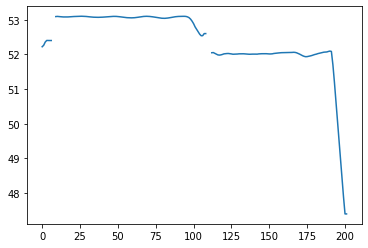

In [ ]:
plot(cond[1,:,1,0])

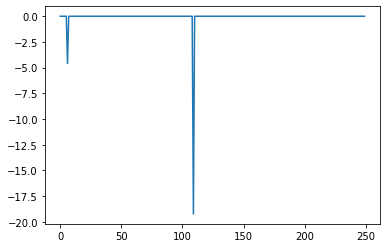

In [ ]:
plot(cond[1,:,1,1])

# More Random Testing

In [ ]:
import librosa

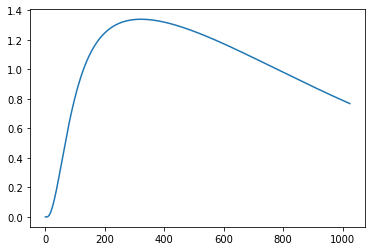

In [ ]:
plot(librosa.db_to_power(librosa.A_weighting(librosa.fft_frequencies(sr=SR, n_fft=2048))))

In [ ]:
import mirdata

In [ ]:
guitarset = mirdata.initialize('guitarset', data_home=GSET_PATH)

In [ ]:
track = guitarset.choice_track()

In [ ]:
midi = track.notes

In [ ]:
print(midi['D'].intervals)

[[ 0.31618776  0.50194739]
 [ 0.50695873  0.72174331]
 [ 0.84738957  1.1898839 ]
 [ 4.99489524  6.35906757]
 [ 6.44081361  6.71364807]
 [ 8.00738957  8.70398821]
 [ 9.31664127  9.49659592]
 [ 9.49797914  9.60827392]
 [ 9.63215147  9.83532608]
 [11.25800181 11.49020136]
 [11.57076825 11.82618776]
 [13.50108571 13.71587029]
 [13.78729887 14.70448707]
 [15.41079093 16.02611973]
 [17.15573424 17.59691338]]


In [ ]:
print(track)

Track(
  audio_hex_cln_path="...itarist-net-storage/data-source/GuitarSet/audio_hex-pickup_debleeded/03_Jazz3-150-C_solo_hex_cln.wav",
  audio_hex_path="...ch/guitarist-net-storage/data-source/GuitarSet/audio_hex-pickup_original/03_Jazz3-150-C_solo_hex.wav",
  audio_mic_path="...rive/Research/guitarist-net-storage/data-source/GuitarSet/audio_mono-mic/03_Jazz3-150-C_solo_mic.wav",
  audio_mix_path="...search/guitarist-net-storage/data-source/GuitarSet/audio_mono-pickup_mix/03_Jazz3-150-C_solo_mix.wav",
  jams_path="...ive/MyDrive/Research/guitarist-net-storage/data-source/GuitarSet/annotation/03_Jazz3-150-C_solo.jams",
  mode="solo",
  player_id="03",
  style="Jazz",
  tempo=150.0,
  track_id="03_Jazz3-150-C_solo",
  audio_hex: Hexaphonic audio (6-channels) with one channel per string

        Returns,
  audio_hex_cln: Hexaphonic audio (6-channels) with one channel per string
           after bleed removal

        Returns,
  audio_mic: The track's audio

        Returns,
  audio_mix: M

In [ ]:
md = midi['D']

In [ ]:
print(md.pitches)

[53.04254418 53.09231479 60.07875584 58.06888365 62.06643517 60.08848159
 59.07837661 57.07812168 55.09652644 53.14374673 55.05704337]


In [ ]:
print(track.pitch_contours["D"])

F0Data(confidence, confidence_unit, frequencies, frequency_unit, resample, time_unit, times, to_matrix, to_mir_eval, to_multif0, to_sparse_index, voicing, voicing_unit)


In [ ]:
print(track.pitch_contours["D"].frequencies)

[  0.      0.      0.    ... 199.501 201.243 202.488]
